## Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load the dataset

In [2]:
df = sns.load_dataset('diamonds')

## Explore the dataset

In [3]:
# Visualize the first ten rows of the dataset
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Visualize the last ten rows of the datafram
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
# Dataset size
df.shape

(53940, 10)

In [6]:
# Basic statistics of the dataset
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [7]:
# Information about missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## Fill in missing values

In [9]:
# Select columns with data types 'float64' or 'int64' (Numerical)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 'numeric_cols' now contains the names of columns with 'float64' or 'int64' data types
numeric_cols

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [10]:
# Select columns with data types 'object' or 'category'()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# 'categorical_cols' now contains the names of columns with 'object' or 'category' data types
categorical_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [11]:
# Create an imputer for numerical values using median as the imputation strategy
imputer_num = SimpleImputer(strategy='median')

# Apply imputation to the numerical columns of the DataFrame
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

In [12]:
# Create a SimpleImputer for categorical values using the 'most_frequent' strategy
imputer_cat = SimpleImputer(strategy='most_frequent')

# Apply imputation to the categorical columns of the DataFrame
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

In [13]:
# Check information about missing values
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


 ## Encoding

In [14]:
# Encoding of categorical variables
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['cut', 'color', 'clarity']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

## EDA

Univariate visualization

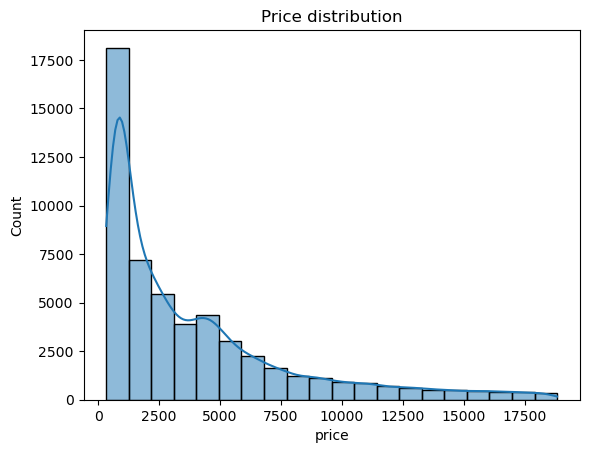

In [15]:
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Price distribution')
plt.show()

Multivariate visualization

<Figure size 800x700 with 0 Axes>

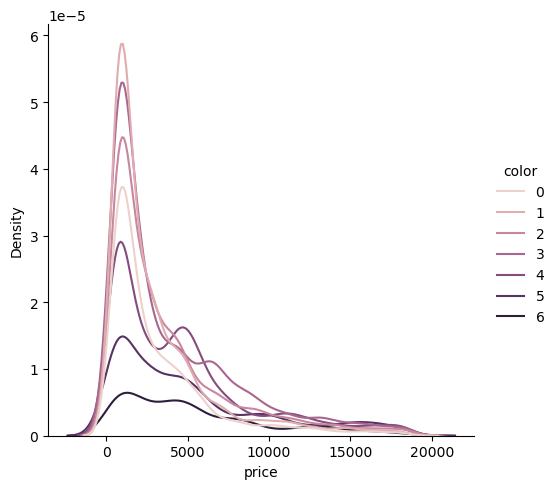

In [16]:
# Create a density plot (KDE) for the "price" column, differentiating by the "color" category
plt.figure(figsize=(8,7))
sns.displot(df, x="price", hue="color", kind="kde")
plt.show()

<Figure size 800x700 with 0 Axes>

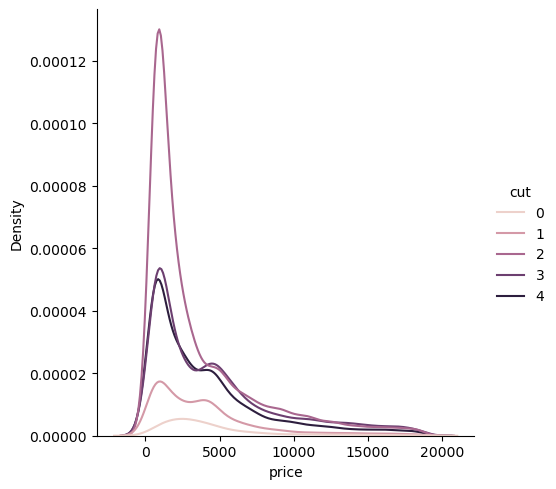

In [17]:
# Create a density plot (KDE) for the "price" column, differentiating by the "cut" category
plt.figure(figsize=(8,7))
sns.displot(df, x="price", hue="cut", kind="kde")
plt.show()

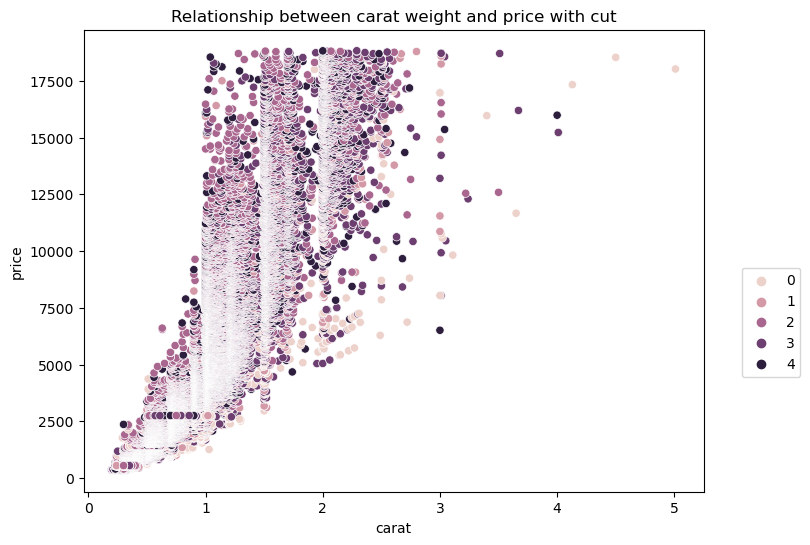

In [18]:
# Visualization of the relationship between carat weight and price with cut
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='carat', y='price', hue='cut')
# Adjust the position of the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')
plt.title('Relationship between carat weight and price with cut')
plt.show()

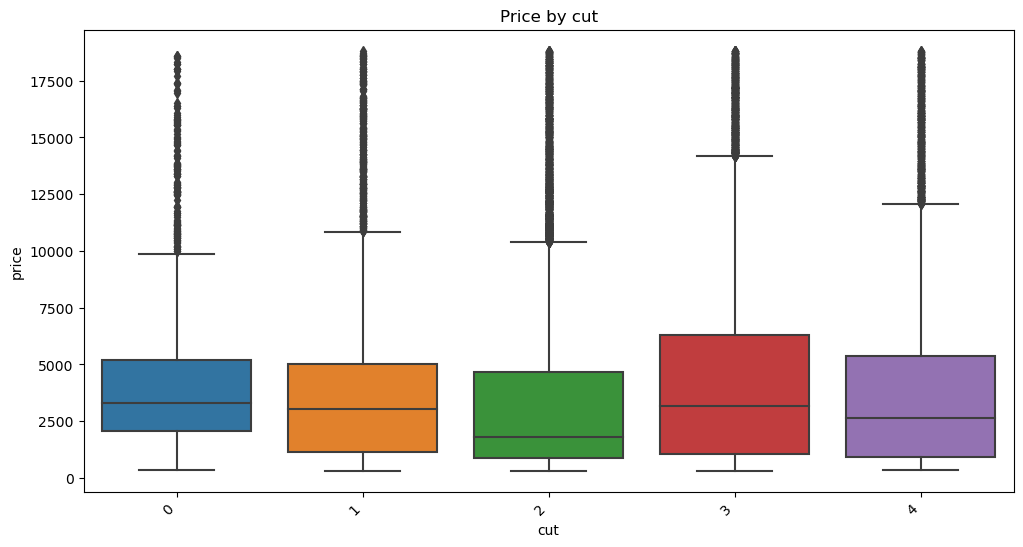

In [19]:
# Visualization of price distribution for each cut type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cut', y='price')
plt.title('Price by cut')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0.5, 1.02, 'Correlation between variables')

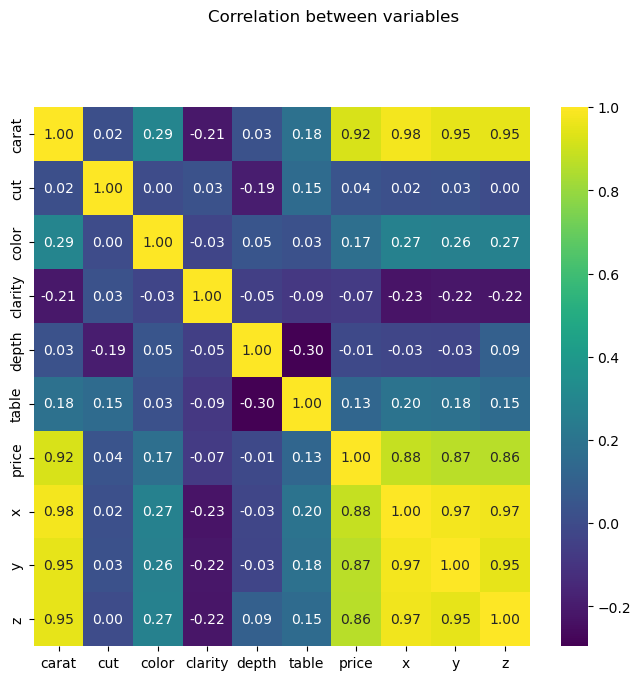

In [20]:
# Create a heatmap of the correlation between numerical variables
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.suptitle("Correlation between variables", y=1.02)


## Create a classification model with scikit-learn

In [21]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('cut', axis=1)
y = df['cut']

In [22]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Random Forest Classification Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Make predictions on the test set

In [24]:
# Predictions
prediction= model.predict(X_test)

## Evaluate the model

In [25]:
# Model evaluation
def evaluate_model(predictions, true_labels, model_name):
    accuracy = accuracy_score(true_labels, predictions)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(true_labels, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(true_labels, predictions))

In [26]:
# Comparativa de modelo
evaluate_model(prediction, y_test, "Random Forest")

--- Random Forest ---
Accuracy: 0.7866
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.79      0.71      0.74      1004
           2       0.82      0.92      0.87      4292
           3       0.77      0.82      0.79      2775
           4       0.69      0.54      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.78      0.78     10788
weighted avg       0.78      0.79      0.78     10788

Confusion Matrix:
[[ 303   19    3    7    3]
 [  20  710   24   41  209]
 [   2   13 3931  167  179]
 [   1    9  309 2265  191]
 [   4  153  504  444 1277]]
